<a href="https://colab.research.google.com/github/UmeshGayashan/OCR_RegNo_Detection/blob/main/OCR_Final4RegNo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install -qU gdown
!pip install -qU easyocr
!apt-get update && apt-get install -y libgl1-mesa-glx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import necessary libraries
import cv2
import easyocr
import numpy as np
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [4]:
# Verify dataset access
dataset_path = '/content/gdrive/MyDrive/OCR_Final4RegNo'
if os.path.exists(dataset_path):
    print(f"Found {len(os.listdir(dataset_path))} files:")
    for idx, file in enumerate(os.listdir(dataset_path), 1):
        print(f"{idx}. {file}")
else:
    print("Error: Folder not found. Check sharing permissions and folder name.")

Found 13 files:
1. EG_2020_3283.jpg
2. EG_2020_4112.jpg
3. EG_2020_4111.jpg
4. EG_2020_3218.jpg
5. EG_2020_8239.jpg
6. EG_2020_9321.jpg
7. EG_2020_7911.jpg
8. EG_2020_4321.jpg
9. EG_2020_2433.jpg
10. EG_2020_7263.jpg
11. EG_2020_7543.jpg
12. EG_2020_5063.jpg
13. EG_2020_9263.jpg


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteProcessing dataset...
📄 Processing: EG_2020_3283.jpg
   Expected: 3283
   Detected: 3283
   Confidence: 2.00
   Status: ✅ Match
----------------------------------------
📄 Processing: EG_2020_4112.jpg
   Expected: 4112
   Detected: 2020
   Confidence: 1.99
   Status: ❌ Mismatch
----------------------------------------
📄 Processing: EG_2020_4111.jpg
   Expected: 4111
   Detected: 2010
   Confidence: 2.00
   Status: ❌ Mismatch
----------------------------------------
📄 Processing: EG_2020_3218.jpg
   Expected: 3218
   Detected: 0103
   Confidence: 1.95
   Status: ❌ Mismatch
----------------------------------------
📄 Processing: EG_2020_8239.jpg
   Expected: 8239
   Detected: 2020
   Confidence: 1.67
   Status: ❌ Mismatch
----------------------------------------
📄 Processing: EG_2020_9321.jpg
   Expected: 9321
   Detected: 0100
   Confidence: 1.98
   Status: ❌ Mismatch
----------------------------------------
📄 P

/tmp/ipython-input-5-3584904565.py:323: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3584904565.py:323: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


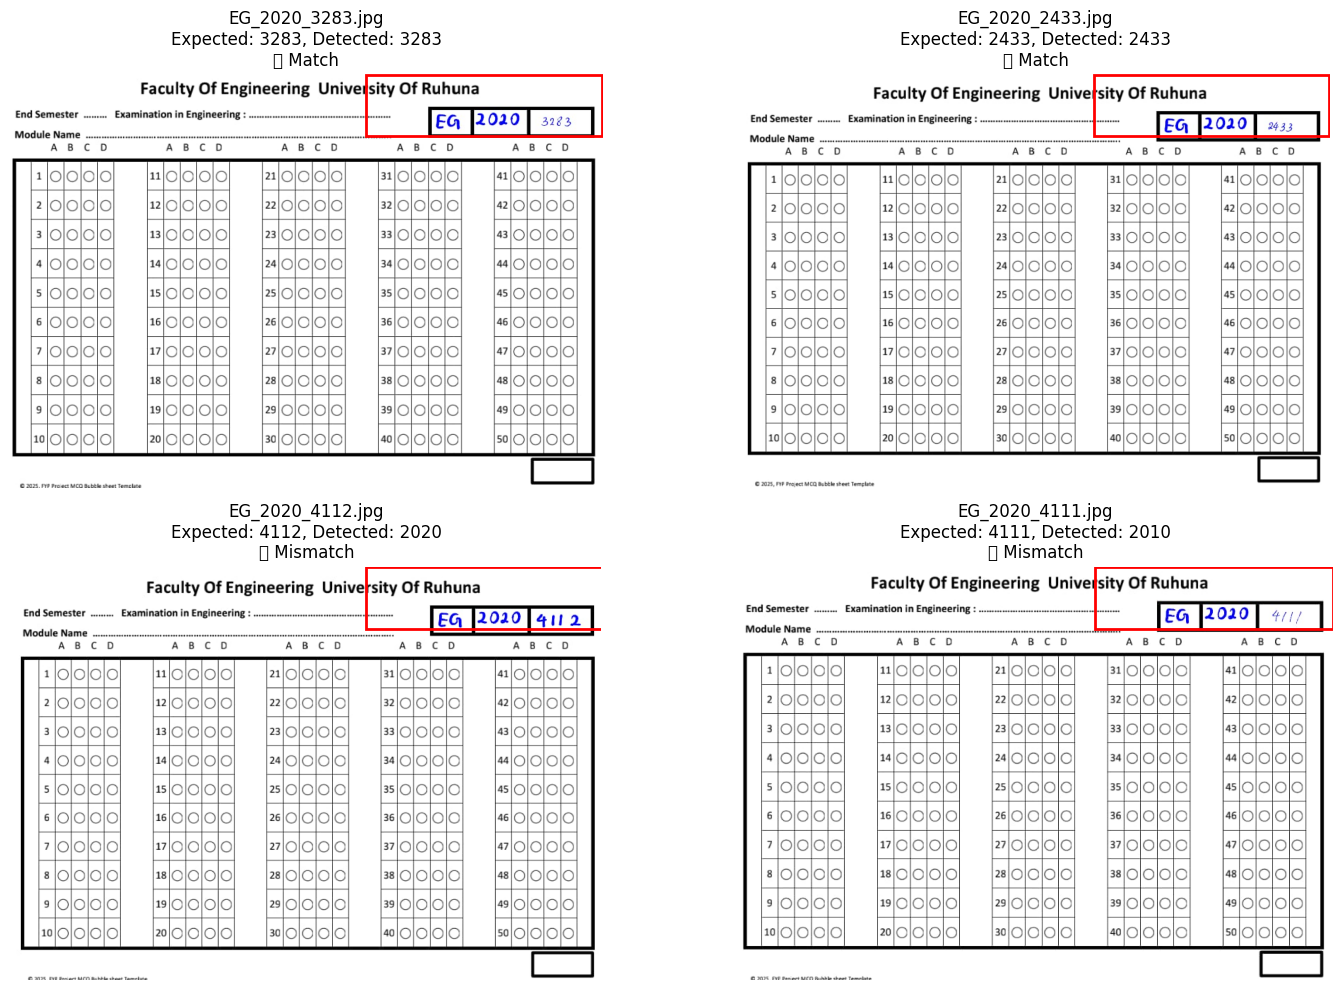

In [5]:
class RegistrationNumberExtractor:
    def __init__(self):
        self.reader = easyocr.Reader(['en'], gpu=False)
        self.results = []

    def extract_digits_from_filename(self, filename):
        """Extract expected last 4 digits from filename"""
        match = re.search(r'EG_2020_(\d{4})\.jpg', filename)
        return match.group(1) if match else None

    def extract_last_4_digits(self, image_path, roi_config=None):
      """Extract the last 4 digits from the third box of registration number"""
      try:
          # Load image
          image = cv2.imread(image_path)
          if image is None:
              return {"error": "Could not load image"}

          height, width = image.shape[:2]

          # Step 1: Locate the registration number rectangle
          # Based on the image, the registration box is in the top-right area
          reg_box_strategies = [
              {"name": "reg_main_box", "x": int(width*0.55), "y": int(height*0.05), "w": int(width*0.42), "h": int(height*0.08)},
              {"name": "reg_alt_box", "x": int(width*0.5), "y": int(height*0.03), "w": int(width*0.48), "h": int(height*0.1)},
              {"name": "reg_wide_box", "x": int(width*0.45), "y": int(height*0.02), "w": int(width*0.52), "h": int(height*0.12)}
          ]

          best_result = None
          best_confidence = 0
          all_attempts = {}

          for reg_strategy in reg_box_strategies:
              try:
                  # Extract the main registration rectangle
                  reg_roi = image[reg_strategy["y"]:reg_strategy["y"]+reg_strategy["h"],
                              reg_strategy["x"]:reg_strategy["x"]+reg_strategy["w"]]

                  if reg_roi.size == 0:
                      continue

                  # Step 2: Divide the registration rectangle into 3 parts
                  # Part 1: "EG" (first ~25% of width)
                  # Part 2: "2020" (middle ~35% of width)
                  # Part 3: "XXXX" (last ~40% of width) - This is what we want
                  reg_roi_height, reg_roi_width = reg_roi.shape[:2]

                  # Focus on the third part (last 4 digits area)
                  third_part_strategies = [
                      # Strategy 1: Standard third division
                      {"name": "third_standard", "start_ratio": 0.6, "end_ratio": 1.0},
                      # Strategy 2: More conservative (in case there's padding)
                      {"name": "third_conservative", "start_ratio": 0.65, "end_ratio": 0.98},
                      # Strategy 3: Slightly wider to catch edge cases
                      {"name": "third_wide", "start_ratio": 0.55, "end_ratio": 1.0}
                  ]

                  for third_strategy in third_part_strategies:
                      # Extract the third part (last 4 digits area)
                      start_x = int(reg_roi_width * third_strategy["start_ratio"])
                      end_x = int(reg_roi_width * third_strategy["end_ratio"])

                      third_part_roi = reg_roi[:, start_x:end_x]

                      if third_part_roi.size == 0:
                          continue

                      # Step 3: Preprocess the third part ROI
                      gray_third = cv2.cvtColor(third_part_roi, cv2.COLOR_BGR2GRAY)

                      # Apply preprocessing techniques optimized for boxed numbers
                      processed_rois = []

                      # Original grayscale
                      processed_rois.append(("original", gray_third))

                      # High contrast version
                      high_contrast = cv2.convertScaleAbs(gray_third, alpha=2.0, beta=-50)
                      processed_rois.append(("high_contrast", high_contrast))

                      # Morphological operations to remove box lines
                      kernel_horizontal = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
                      kernel_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))

                      # Remove horizontal lines
                      temp1 = cv2.morphologyEx(gray_third, cv2.MORPH_OPEN, kernel_horizontal)
                      no_horizontal = gray_third - temp1

                      # Remove vertical lines
                      temp2 = cv2.morphologyEx(no_horizontal, cv2.MORPH_OPEN, kernel_vertical)
                      clean_roi = no_horizontal - temp2
                      processed_rois.append(("clean_lines", clean_roi))

                      # Binary threshold versions
                      _, binary_thresh = cv2.threshold(gray_third, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                      processed_rois.append(("binary_otsu", binary_thresh))

                      # Adaptive threshold
                      adaptive_thresh = cv2.adaptiveThreshold(gray_third, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                            cv2.THRESH_BINARY, 11, 2)
                      processed_rois.append(("adaptive", adaptive_thresh))

                      # Step 4: Apply OCR to each processed version
                      for prep_name, processed_roi in processed_rois:
                          # Perform OCR with digit-only allowlist
                          ocr_results = self.reader.readtext(processed_roi,
                                                          allowlist='0123456789',
                                                          width_ths=0.1,  # Lower width threshold
                                                          height_ths=0.1)  # Lower height threshold

                          # Extract digits with confidence
                          detected_digits = []
                          total_confidence = 0
                          valid_results = 0

                          for (bbox, text, confidence) in ocr_results:
                              if confidence > 0.1:  # Lower threshold for digits in boxes
                                  # Clean the text to only digits
                                  clean_text = re.sub(r'[^0-9]', '', text)
                                  if clean_text:
                                      detected_digits.append(clean_text)
                                      total_confidence += confidence
                                      valid_results += 1

                          if detected_digits:
                              # Join all detected digits
                              full_digit_string = ''.join(detected_digits)
                              avg_confidence = total_confidence / valid_results if valid_results > 0 else 0

                              # Try to extract exactly 4 digits
                              four_digit_result = None

                              # Method 1: Look for exactly 4 consecutive digits
                              four_digit_matches = re.findall(r'\d{4}', full_digit_string)
                              if four_digit_matches:
                                  four_digit_result = four_digit_matches[-1]  # Take the last match

                              # Method 2: If we have exactly 4 digits total
                              elif len(full_digit_string) == 4 and full_digit_string.isdigit():
                                  four_digit_result = full_digit_string

                              # Method 3: Take last 4 digits if we have more than 4
                              elif len(full_digit_string) > 4:
                                  four_digit_result = full_digit_string[-4:]

                              # Method 4: Take all digits if we have less than 4 but more than 0
                              elif len(full_digit_string) > 0:
                                  four_digit_result = full_digit_string

                              attempt_key = f"{reg_strategy['name']}_{third_strategy['name']}_{prep_name}"
                              all_attempts[attempt_key] = {
                                  'text': full_digit_string,
                                  'four_digit_result': four_digit_result,
                                  'confidence': avg_confidence,
                                  'method': 'third_box_extraction'
                              }

                              # Update best result based on confidence and digit count
                              if four_digit_result and len(four_digit_result) == 4:
                                  # Prefer 4-digit results with higher confidence
                                  score = avg_confidence * 2  # Bonus for exact 4 digits
                                  if score > best_confidence:
                                      best_result = four_digit_result
                                      best_confidence = score
                              elif four_digit_result and avg_confidence > best_confidence:
                                  # Accept partial results if no 4-digit found yet
                                  best_result = four_digit_result
                                  best_confidence = avg_confidence

              except Exception as e:
                  continue

          return {
              'detected_digits': best_result if best_result else "Not found",
              'confidence': best_confidence,
              'all_attempts': all_attempts
          }

      except Exception as e:
          return {"error": str(e)}

    def process_dataset(self, dataset_path):
        """Process entire dataset and compare results"""
        # List of expected files
        expected_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        results = []
        print("Processing dataset...")
        print("="*80)

        for filename in expected_files:
            image_path = os.path.join(dataset_path, filename)

            if not os.path.exists(image_path):
                print(f"❌ File not found: {filename}")
                continue

            print(f"📄 Processing: {filename}")

            # Extract expected digits from filename
            expected_digits = self.extract_digits_from_filename(filename)

            # Extract digits from image
            extraction_result = self.extract_last_4_digits(image_path)

            if 'error' in extraction_result:
                detected_digits = "Error"
                confidence = 0
                status = "❌ Error"
            else:
                detected_digits = extraction_result['detected_digits']
                confidence = extraction_result['confidence']

                # Compare with expected
                if detected_digits == expected_digits:
                    status = "✅ Match"
                else:
                    status = "❌ Mismatch"

            result = {
                'filename': filename,
                'expected_digits': expected_digits,
                'detected_digits': detected_digits,
                'confidence': confidence,
                'status': status,
                'match': detected_digits == expected_digits
            }

            results.append(result)

            print(f"   Expected: {expected_digits}")
            print(f"   Detected: {detected_digits}")
            print(f"   Confidence: {confidence:.2f}")
            print(f"   Status: {status}")
            print("-" * 40)

        self.results = results
        return results

    def generate_report(self):
        """Generate detailed accuracy report"""
        if not self.results:
            print("No results to report. Run process_dataset first.")
            return

        df = pd.DataFrame(self.results)

        # Calculate metrics
        total_files = len(df)
        successful_detections = len(df[df['detected_digits'] != 'Not found'])
        correct_matches = len(df[df['match'] == True])
        accuracy = (correct_matches / total_files) * 100 if total_files > 0 else 0
        detection_rate = (successful_detections / total_files) * 100 if total_files > 0 else 0

        print("\n" + "="*80)
        print("📊 FINAL REPORT")
        print("="*80)
        print(f"Total files processed: {total_files}")
        print(f"Successful detections: {successful_detections}")
        print(f"Correct matches: {correct_matches}")
        print(f"Detection rate: {detection_rate:.1f}%")
        print(f"Accuracy rate: {accuracy:.1f}%")
        print()

        # Show detailed results table
        print("📋 DETAILED RESULTS:")
        print("-" * 80)
        for result in self.results:
            print(f"{result['filename']:<20} | Expected: {result['expected_digits']} | "
                  f"Detected: {result['detected_digits']:<10} | {result['status']}")

        # Show mismatches
        mismatches = df[df['match'] == False]
        if not mismatches.empty:
            print("\n❌ MISMATCHES ANALYSIS:")
            print("-" * 50)
            for _, row in mismatches.iterrows():
                print(f"{row['filename']}: Expected {row['expected_digits']}, Got {row['detected_digits']}")

        return df

    def visualize_sample_results(self, num_samples=4):
        """Visualize sample results with ROI highlighted"""
        if not self.results:
            print("No results to visualize. Run process_dataset first.")
            return

        # Select samples (mix of successful and failed)
        successful = [r for r in self.results if r['match']]
        failed = [r for r in self.results if not r['match']]

        samples = successful[:2] + failed[:2] if len(failed) >= 2 else self.results[:num_samples]

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()

        for idx, result in enumerate(samples[:4]):
            if idx >= len(axes):
                break

            image_path = os.path.join(dataset_path, result['filename'])
            if os.path.exists(image_path):
                image = cv2.imread(image_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                axes[idx].imshow(image_rgb)
                axes[idx].set_title(f"{result['filename']}\n"
                                  f"Expected: {result['expected_digits']}, "
                                  f"Detected: {result['detected_digits']}\n"
                                  f"{result['status']}")
                axes[idx].axis('off')

                # Draw ROI rectangle
                height, width = image.shape[:2]
                roi_x, roi_y = int(width * 0.6), 0
                roi_width, roi_height = int(width * 0.4), int(height * 0.15)

                from matplotlib.patches import Rectangle
                rect = Rectangle((roi_x, roi_y), roi_width, roi_height,
                               linewidth=2, edgecolor='red', facecolor='none')
                axes[idx].add_patch(rect)

        plt.tight_layout()
        plt.show()

# Main execution
def main():
    # Initialize extractor
    extractor = RegistrationNumberExtractor()

    # Process entire dataset
    results = extractor.process_dataset(dataset_path)

    # Generate report
    df = extractor.generate_report()

    # Visualize sample results
    extractor.visualize_sample_results()

    return results, df

# Run the analysis
if __name__ == "__main__":
    results, report_df = main()
